## Titanic of Disaster

#### 타이타닉에서 실제 일어났던 사고의 데이터를 기반으로 사망자 / 생존자를 예측하는 과정.

## --- 항목 별 설명 ---

##### PassengerId : 승객 번호
##### Survived : 생존 여부 (0 : 사망, 1 : 생존)
##### Pclass : 티켓 등급 (1 = 1등급, 2 = 2등급, 3 = 3등급)
##### Name : 승객 이름
##### Sex : 성별
##### Age : 나이
##### SibSp : 형제, 자매, 남편, 아내 등이 동승한 경우 (0 = 없음, 1 = 동승함)
##### Parch : 부모 자식이 같이 동승한 경우 (0 = 없음, 1 = 동승함)
##### Ticket : 티켓번호
##### Cabin : 객실번호
##### Embarked : 탑승한 선착장 위치 (C = Cherbourg, Q = Queenstown, S = Southhampton)

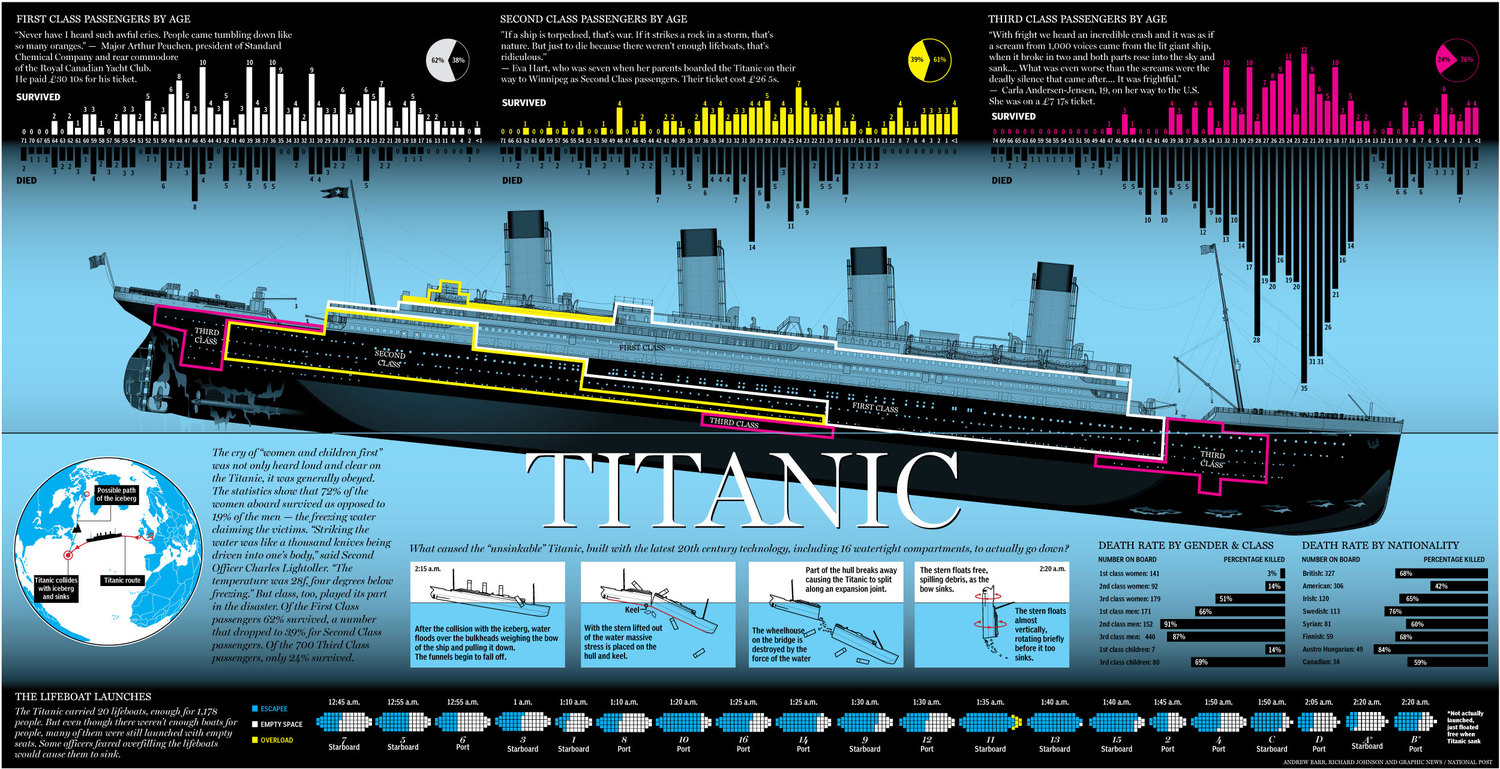

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("train.shape : ", train.shape)
print("test shape : ", test.shape)
print("\n")
print(train.info())
print("\n")
print(test.info())

train.shape :  (891, 12)
test shape :  (418, 11)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket    

## 함수 (원형 차트)

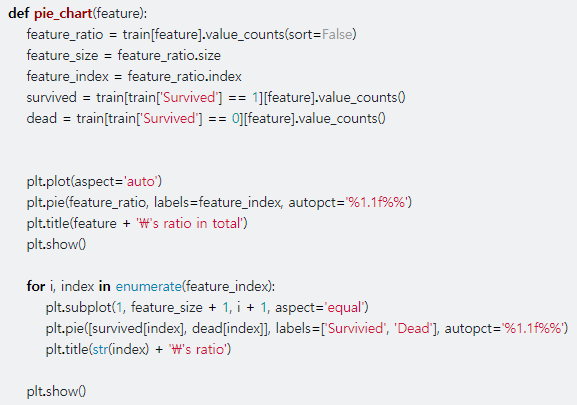

In [5]:
def pie_chart(feature): 
    # pie_chart 함수를 만들고 입력변수는 feature로 한다.
    feature_ratio = train[feature].value_counts(sort=False) 
    #train의 feature 컬럼에 해당되는 수를 카운팅 한다. sort기능을 False로 지정하여 개별적인 비율을 카운팅하게 해준다.
    feature_size = feature_ratio.size 
    #위에 정의한 feature_ratio 변수에 size기능을 추가했다. 이는 개별 종류의 수를 
    feature_index = feature_ratio.index 
    #위에 정의한 feature_ratio 변수에 index기능을 추가했다.
    survived = train[train['Survived'] == 1][feature].value_counts()
    #생존자에 대한 수를 카운팅한다. 이 때, feature 즉, 해당되는 컬럼을 기준으로 카운팅 한다.
    dead = train[train['Survived'] == 0][feature].value_counts()
    #사망자에 대한 수를 카운팅한다. 이 때, feature 즉, 해당되는 컬럼을 기준으로 카운팅 한다.
    
    plt.plot(aspect='auto')
    #plot의 모양을 자동으로 설정.
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
    #원형차트를 출력한다. 지정해놓은 변수를 기준으로 하고, 레이블을 지정해준다. 표시형은 소수점 한 자리의 실수값으로 표현한다.
    plt.title(feature + "\'s ratio in total")
    #표의 제목을 지정해준다. 함수를 지정할 때, 쓴 문자열과 현재 지정된 문자열을 합쳐서 쓴다.
    plt.show()
    #표를 출력한다.
    
    
    ## 원형 표에서 나온 각 분류에 대한 생존자와 사망자를 표시하기 위한 반복문
    ## 여기서 enumerate는 해당 인덱스 값을 열거하는 기능을 한다.
    ## 만약에 항목이 3 가지인 항목이라면, 반복문을 통해 3 종류의 개별적인 작은 원형 그래프가 나온다.
    for i, index in enumerate(feature_index):
        ## i, 와 index를 feature_index변수 내에 포함된 가짓 수 만큼 반복한다.
        plt.subplot(1, feature_size + 1, i + 1, aspect = 'equal')
        # subplot 기능(여러 개의 그래프를 뽑을 수 있다.)을 이용해 해당 가짓 수 만큼의 그래프를 출력
        # aspect 를 이용해 그래프의 크기를 같도록 설정한다.
        plt.pie([survived[index], dead[index]], labels = ['Survived', 'Dead'], autopct='%1.1f%%')
        # 원형그래프를 이용하고, feature_index 안의 내용을 출력한다. 표시방식은 퍼센트 방식.
        plt.title(str(index) + "\'s ratio")
        # 그래프의 명칭을 지정한다.
        
    plt.show()
    # 설정한 그래프를 출력한다.

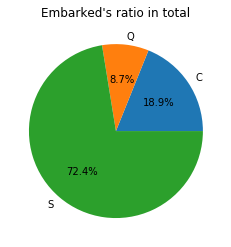

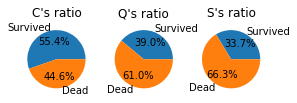

In [6]:
pie_chart("Embarked")

## 함수 (바 차트)

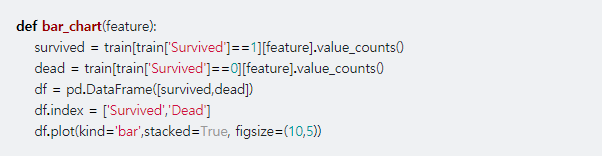

In [9]:
## 막대 차트를 이용해 목록에 대한 내용을 비교한다.
def bar_chart(feature):
    # 함수를 bar_chart로 명명하고, 해당하는 feature가 입력되면 아래에 있는 내용이 실행된다.
    survived = train[train['Survived'] == 1][feature].value_counts()
    # 입력된 항목에 대한 생존자를 카운팅한다.
    dead = train[train['Survived'] == 0][feature].value_counts()
    # 입력된 항목에 대한 사망자를 카운팅한다.
    df = pd.DataFrame([survived, dead])
    # 변수 df를 만들고 카운팅한 생존자와 사망자를 데이터 프레임 형식으로 결합한다.
    df.index = ['Survived', 'Dead']
    # 변수 df의 컬럼을 Survived와 Dead로 지정한다.
    df.plot(kind = 'bar', stacked = True, figsize=(10, 5))
    # 변수 df를 차트로 설정한다. 막대 차트 옵션을 넣고, 한 막대에 여러 항목이 겹치게 한다.
    # 그래프 사이즈를 가로 10 세로 5로 설정한다.

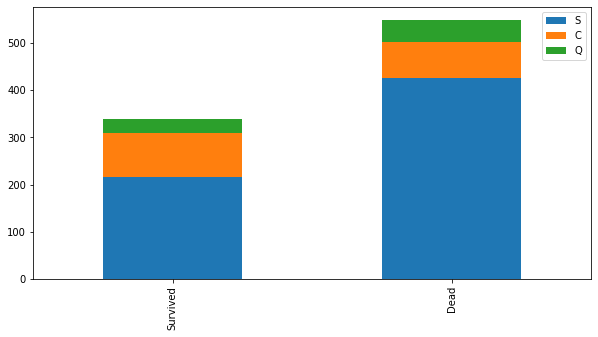

In [11]:
bar_chart("Embarked")

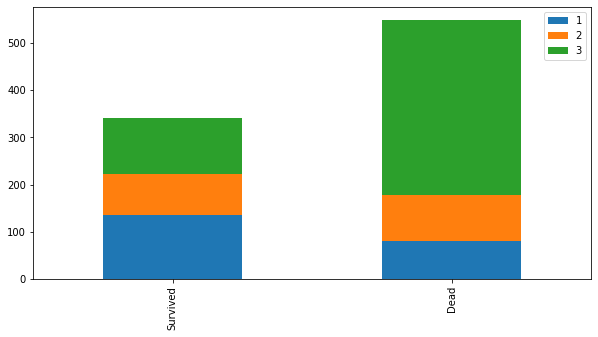

In [12]:
bar_chart("Pclass")

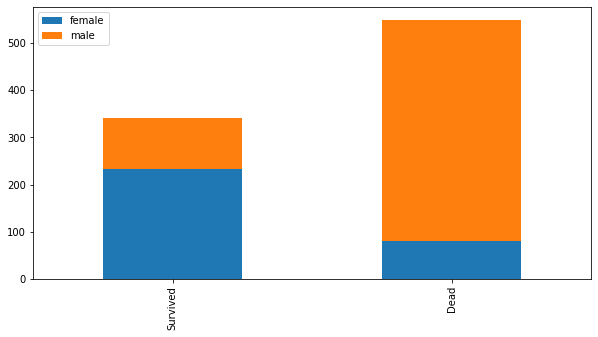

In [13]:
bar_chart("Sex")

In [15]:
train_and_test = [train, test]
# train파일과 test파일을 합친다.
# 이때, train, test파일은 불러온 csv파일이므로, 다른 역할은 하지 않는다.

In [16]:
# 승객의 이름을 기입한 Name 컬럼에서 각 인원의 특정 명칭인 Title을 추출하기 위한 코드를 작성.
for dataset in train_and_test:
    #train_and_test 안의 있는 모든 dataset을 반복하여 작업한다.
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')
    # Title이란 컬럼을 지정하고, Name 컬럼의 문자열을 분할한다. (' ([A-Za-z]+)\.') 식으로.

train.head(5)
# 작업한 내용이 잘 나오는지 확인을 위해 출력.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [18]:
pd.crosstab(train['Title'], train['Sex'])
# 명칭과 성별을 한번에 확인하기 위해 crosstab 함수를 이용해 출력
# 첫번째 항목은 '행', 두번째 항목은 '열'
# 인덱스를 반대로 적게 되면 가로로 긴 DataFrame이 나온다.

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [26]:
## 많은 명칭이 있기 때문에, 간략화 시키기 위한 코드 작성,
for dataset in train_and_test:
    # train_and_test 안의 있는 모든 dataset을 반복하여 작업한다.
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer',
                                                 'Lady','Major', 'Rev', 'Sir'], 'Other')
    # title인덱스 안에 있는 여러 명칭을 'Other'로 재 정의 한다.
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    # title인덱스 안에 있는 Mlle 라는 명칭을 Miss로 재 정의 한다.
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # title인덱스 안에 있는 Mme 이라는 명칭을 Mrs로 재 정의 한다.
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    # title인덱스 안에 있는 Ms 이라는 명칭을 Miss로 재 정의 한다.

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
# 명칭 별 생존 비율을 구하기 위해 train안의 두 컬럼을 입력하고, groupby함수를 이용해 두 컬럼을 묶는다.
# 이 때, Title을 기준으로 결합하고, 인덱스 구분을 False로 지정하여 컬럼의 우선순위를 동등하게 했다.
# 이 후, 결합된 내용을 평균내어 출력한다.

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [11]:
## 문자로 된 형태의 컬럼을 모두 문자열로 재 정의 하는 코드 작성.
for dataset in train_and_test:
    # train_and_test 안의 있는 모든 dataset을 반복하여 작업한다.
    dataset['Title'] = dataset['Title'].astype(str)
    dataset['Sex'] = dataset['Sex'].astype(str)

In [12]:
train["Embarked"].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [13]:
for dataset in train_and_test:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].astype(str)

In [14]:
for dataset in train_and_test:
    dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
    dataset['Age'] = dataset['Age'].astype(int)
    train['AgeBand'] = pd.cut(train['Age'], 5)
print (train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()) # Survivied ratio about Age Band

         AgeBand  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.344762
2   (32.0, 48.0]  0.403226
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [15]:
for dataset in train_and_test:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    dataset['Age'] = dataset['Age'].map( { 0: 'Child',  1: 'Young', 2: 'Middle', 3: 'Prime', 4: 'Old'} ).astype(str)

In [16]:
print (train[['Pclass', 'Fare']].groupby(['Pclass'], as_index=False).mean())
print("")
print(test[test["Fare"].isnull()]["Pclass"])

   Pclass       Fare
0       1  84.154687
1       2  20.662183
2       3  13.675550

152    3
Name: Pclass, dtype: int64


In [17]:
for dataset in train_and_test:
    dataset['Fare'] = dataset['Fare'].fillna(13.675)

In [18]:
for dataset in train_and_test:
    dataset.loc[ dataset['Fare'] <= 7.854, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 10.5), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 21.679), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 39.688), 'Fare']   = 3
    dataset.loc[ dataset['Fare'] > 39.688, 'Fare'] = 4
    dataset['Fare'] = dataset['Fare'].astype(int)

In [19]:
for dataset in train_and_test:
    dataset["Family"] = dataset["Parch"] + dataset["SibSp"]
    dataset['Family'] = dataset['Family'].astype(int)

In [20]:
features_drop = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId', 'AgeBand'], axis=1)

print(train.head())
print(test.head())

   Survived  Pclass     Sex     Age  Fare Embarked Title  Family
0         0       3    male   Young     0        S    Mr       1
1         1       1  female  Middle     4        C   Mrs       1
2         1       3  female   Young     1        S  Miss       0
3         1       1  female  Middle     4        S   Mrs       1
4         0       3    male  Middle     1        S    Mr       0
   PassengerId  Pclass     Sex     Age  Fare Embarked Title  Family
0          892       3    male  Middle     0        Q    Mr       0
1          893       3  female  Middle     0        S   Mrs       1
2          894       2    male   Prime     1        Q    Mr       0
3          895       3    male   Young     1        S    Mr       0
4          896       3  female   Young     2        S   Mrs       2


In [21]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

train_label = train['Survived']
train_data = train.drop('Survived', axis=1)
test_data = test.drop("PassengerId", axis=1).copy()

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

In [23]:
train_data, train_label = shuffle(train_data, train_label, random_state = 5)

In [24]:
def train_and_test(model):
    model.fit(train_data, train_label)
    prediction = model.predict(test_data)
    accuracy = round(model.score(train_data, train_label) * 100, 2)
    print("Accuracy : ", accuracy, "%")
    return prediction

In [25]:
log_pred = train_and_test(LogisticRegression())
# SVM
svm_pred = train_and_test(SVC())
#kNN
knn_pred_4 = train_and_test(KNeighborsClassifier(n_neighbors = 4))
# Random Forest
rf_pred = train_and_test(RandomForestClassifier(n_estimators=100))
# Navie Bayes
nb_pred = train_and_test(GaussianNB())

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy :  82.72 %
Accuracy :  83.5 %
Accuracy :  85.41 %
Accuracy :  88.55 %
Accuracy :  79.8 %


In [26]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": rf_pred
})

submission.to_csv('submission_rf.csv', index=False)

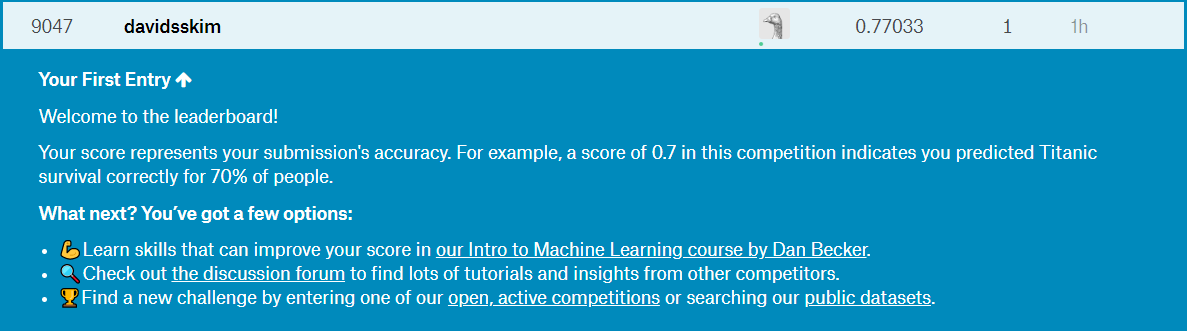